Classification Report on Test Set:
              precision    recall  f1-score   support

   No Stress       0.95      0.79      0.86       224
      Stress       0.54      0.86      0.66        64

    accuracy                           0.81       288
   macro avg       0.75      0.82      0.76       288
weighted avg       0.86      0.81      0.82       288



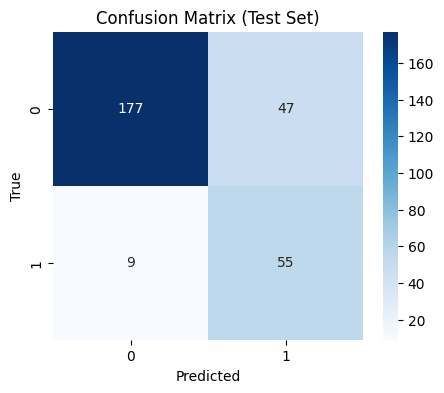

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/WESAD_pkl/ECG/merged_file_all_test.csv')

# binary stress label (Label==2 then 1 else 0
df['Label'] = df['Label'].apply(lambda x: 1 if x == 2 else 0)

# drop label
non_feature_cols = ['Label']
X = df.drop(columns=non_feature_cols, errors='ignore')
y = df['Label']


# train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42,stratify=y
)

clf = SVC(kernel='rbf', class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)
# Predict on test set
y_pred = clf.predict(X_test)

#report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred, target_names=['No Stress', 'Stress']))
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()


Preparing 2D visualization with PCA...


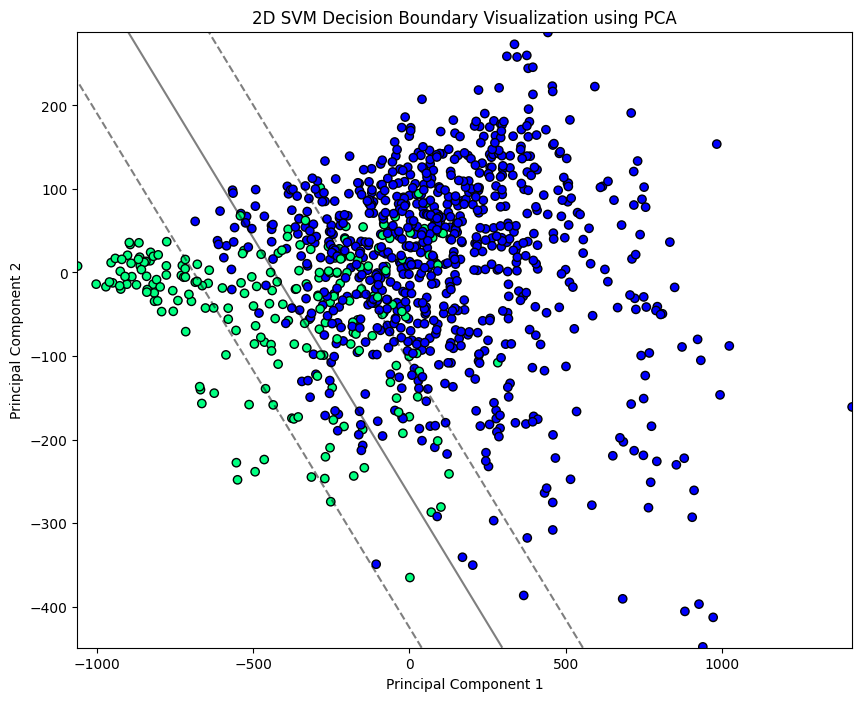

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset
# Using the file you uploaded: 'merged_file.csv'
df = pd.read_csv('/content/drive/MyDrive/WESAD_pkl/ECG/merged_file_all_test.csv')

# --- Binary Classification Mapping ---
# Map label 2 to 1, and all other labels to 0.
df['Label'] = np.where(df['Label'] == 2, 1, 0)

# Select all columns except 'Label' as features
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



#Visualization(Using PCA for 2D Plot)
print("\nPreparing 2D visualization with PCA...")
# Reduce dimensionality to 2 components for plotting
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

#SVC model on the 2 PCA components for visualization
svc_pca = SVC(kernel='linear')
svc_pca.fit(X_train_pca, y_train)

#meshgrid to plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 0.5))

#decision function for the meshgrid points
Z = svc_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plotting 2D Decision Boundary
plt.figure(figsize=(10, 8))
# Plot the data points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='winter', marker='o', edgecolors='k')
# Plot the decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D SVM Decision Boundary Visualization using PCA')
plt.show()

